# House Price Prediction With ML

#### Team Precision 
* Sunil
* Samuel 
* Sanjay
* Preneeth

<b>Source Code:</b> https://github.com/preneetho/ML/tree/master/Capstone%20Project

## Problem Statement

Building a tool to Predict the selling price of a house in given area by considering the parameters like Location, latitude & longitude, no. of bedrooms, bathrooms, no. of floors, area of house in sqft, condition of house, furnished or non-furnished, basement…etc. We have around 100 years of past data (21K records) to build the tool. The tool should leaverage machine learning to build a regression model to predict the right price. 

<img src="https://github.com/preneetho/ML/blob/master/Capstone%20Project/House1.jpg?raw=true">

## 1. Understanding Client & their Problems

#### 1.1. Current Situation

In the current market for home buyers and sellers there is no tool available to estimate the price of a house. Home buyers & sellers end up with long negotiations before finalizing the prices. The reason for it is there is no benchmark for house price. Buyers tries to reduce the price unreasonably without understanding current market price. Sellers quote exorbitant prices without considering the true value of the property. The prices of houses are decided by word of mouth and there is no scientific approach to decide on the price by considering all the factors like location, size, age etc.

#### 1.2. Opportunity for improvement

To overcome the above problem, there should be benchmark for the house prices by considering all external factors which decide the price of the house. We need to have tool like KBB (Kelley Blue Book) in US to get a best price for cars. A similar tool needs to be implemented for House Pricing. It would help both buyer and seller.

#### 1.3. Data Requirement

To build such tool, we would require past house transaction data with all details like area of house, type of house, rooms, location, age, price and many more attributes of the house. The attributes of house will help in deciding the right price for the house.

#### 1.4. Source of data and challenges

The data needs to be collected from various sources. The house transactions details can be obtained from District Registar office. It will contain the most of the house details + price. We would also need details about the locality, like schools, offices, railway stations, bus stations. These details can be obtained from Muncipal corporations. Getting all the details from various sources would be a big challenge, as the data might not be in required electronic format. Good amount of ground work need to be done to collate the data from different source systems and consolidate it for further processing.

#### 1.5. Size of the data

We would require atleast 5 years of data from multiple locations. The data should have pricing for various sizes of houses, types of house and location of houses. The effectiveness of the tool will depend of the quality and quantity of the past data. 

## 2. Understand the Data

### 2.1. Import necessary Libraries

In [223]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

#import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sn

from sklearn import svm
from scipy.stats import zscore

from scipy import stats
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
%matplotlib inline
sn.set(color_codes = True)
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.model_selection import RandomizedSearchCV

### 2.2. Load the Data

In [224]:
dataSet = pd.read_csv('innercity.csv')
dataSet.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [225]:
dataSet.shape

(21613, 23)

In [226]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

<b>Findings:</b>
    * There are 21613 rows and 23 columns
    * All are numeric data except for dayhours
    * Looks like there are no null values. We need to explore further to confirm it.

In [227]:
#Finding unique values each column.

print ("Bed Rooms : ")
print (*list(dataSet.room_bed.unique()))

print ("Bath Rooms : ")
print (*list(dataSet.room_bath.unique()))

print ("Ceil : ")
print (*list(dataSet.ceil.unique()))

print ("Coast : ")
print (*list(dataSet.coast.unique()))

print ("Sight : ")
print (*list(dataSet.sight.unique()))

print ("Condition : ")
print (*list(dataSet.condition.unique()))

print ("Quality : ")
print (*list(dataSet.quality.unique()))

print ("Built Year : ")
years = dataSet.yr_built.copy()
years = years.sort_values()
print (*list(years.unique()))

print ("Renovated Year : ")
years = dataSet.yr_renovated.copy()
years = years.sort_values()
print (*list(years.unique()))

print ("Furnished : ")
print (*list(dataSet.furnished.unique()))

Bed Rooms : 
4 3 2 5 6 1 8 33 7 0 9 10 11
Bath Rooms : 
3.25 2.5 1.0 1.5 1.75 2.0 2.75 2.25 3.0 4.0 4.5 3.5 5.25 4.75 4.25 5.0 7.75 3.75 0.75 5.5 6.75 1.25 6.25 0.0 5.75 6.0 0.5 6.5 7.5 8.0
Ceil : 
1.0 2.0 3.0 1.5 2.5 3.5
Coast : 
0 1
Sight : 
0 2 4 3 1
Condition : 
5 3 4 2 1
Quality : 
9 8 6 7 10 11 5 13 12 4 3 1
Built Year : 
1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
Renovated Year : 
0 1934 1940 1944 1945 1946 1948 1950 1951 1953 1954 1955 1956 1957 1958 

### 2.3. Understand each attribute at high level

<Table border=1, align=left>
<TR align=left>
    <TH>#</TH>
    <TH>Col Name</TH>
    <TH>Description</TH>
    <TH>Type</TH>
    <TH>Data Type</TH>
    <TH>Categorical Attributes</TH>
    <TH>Remarks</TH>
</TR>

<TR style="color:red;">
    <TD>
        1.
    </TD>
    <TD>
        cid
    </TD>
    <TD>
        A notation for a house
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        This attribute does not have any significance.
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        2.
    </TD>
    <TD>
        dayhours
    </TD>
    <TD>
        Date on which House was sold
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        String
    </TD>
     <TD>
        No
    </TD>
     <TD>
        The format of the data is YYYYMMDDT000000. The date need to be extracted from it.
    </TD>
</TR>



<TR >
    <TD>
        3.
    </TD>
    <TD>
        room_bed
    </TD>
    <TD>
        Number of Bedrooms
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>

<TR >
    <TD>
        4.
    </TD>
    <TD>
        room_bath
    </TD>
    <TD>
        Number of bathrooms
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        5.
    </TD>
    <TD>
        living_measure
    </TD>
    <TD>
        square footage of the home
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It is Ceil_Measure + Basement Measure. So there is no need to keep this column.

    </TD>
</TR>

<TR >
    <TD>
        6.
    </TD>
    <TD>
        lot_measure
    </TD>
    <TD>
        Lot size, refers to the size of the land that your property is on
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        There is lot_measure15 column which gives the lot area measurement as on 2015. We need decide to retain lot_measure15 column or this column. We will decide it after further analysis.
    </TD>
</TR>

<TR >
    <TD>
        7.
    </TD>
    <TD>
        ceil
    </TD>
    <TD>
        Number of floors
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It holds values 1.0 2.0 3.0 1.5 2.5 3.5
    </TD>
</TR>

<TR >
    <TD>
        8.
    </TD>
    <TD>
        coast
    </TD>
    <TD>
        House which has a view to a waterfront
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        0 - It has no waterfront view
        1 - It has waterfront view
    </TD>
</TR>

<TR>
    <TD>
        9.
    </TD>
    <TD>
        Sight
    </TD>
    <TD>
        Has been viewed
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        Holds values 0, 1, 2, 3, 4. 
    </TD>
</TR>

<TR >
    <TD>
        10.
    </TD>
    <TD>
        condition
    </TD>
    <TD>
        How good the condition is (Overall)
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        Holds values 1, 2, 3, 4, 5. Rating for condition -  1 being bad condition and 5 being Excellent condition.
    </TD>
</TR>

<TR >
    <TD>
        11.
    </TD>
    <TD>
        quality
    </TD>
    <TD>
        Grade given to the housing unit, based on grading system
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        Quality scale - 1 to 13.
    </TD>
</TR>

<TR>
    <TD>
        12.
    </TD>
    <TD>
        ceil_measure
    </TD>
    <TD>
        square footage of house apart from basement
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        The house area is covered in living_measure15, however we need to decide to retain this column or living_measure15 after futher analysis.
    </TD>
</TR>

<TR>
    <TD>
        13.
    </TD>
    <TD>
        basement
    </TD>
    <TD>
        square footage of the basement
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        The property will have better value if there is basement. We can convert it into a categorical column too.
    </TD>
</TR>

<TR >
    <TD>
        14.
    </TD>
    <TD>
        yr_built
    </TD>
    <TD>
        Built Year
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        Data is available from 1900 to 2015
    </TD>
</TR>

<TR>
    <TD>
        15.
    </TD>
    <TD>
        yr_renovated
    </TD>
    <TD>
        Year when house was renovated
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        0 - Means the house was not renovated;
        Year - The year when it was renovated.
    </TD>
</TR>

<TR >
    <TD>
        16.
    </TD>
    <TD>
        zipcode
    </TD>
    <TD>
        Zip Code of the area
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>

<TR >
    <TD>
        17.
    </TD>
    <TD>
        lat
    </TD>
    <TD>
        Latitude coordinate
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        There is Zip Code Available. Do we need to keep this column? We will decide it later during bi variant analysis
    </TD>
</TR>

<TR >
    <TD>
        18.
    </TD>
    <TD>
        long
    </TD>
    <TD>
        Longitude coordinate
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        There is Zip Code Available. Do we need to keep this column? We will decide it later during bi variant analysis
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        19.
    </TD>
    <TD>
        living_measure15
    </TD>
    <TD>
         Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It has the latest area as on 2015. But there are houses sold in 2014 that means this column was not considered for pricing of house. There are houses which are not renovated yet there is change in living measure, that means may be in 2015 correction was done.
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        20.
    </TD>
    <TD>
        lot_measure15
    </TD>
    <TD>
        lotSize area in 2015(implies-- some renovations)
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It has the latest area as on 2015. But there are houses sold in 2014 that means this column was not considered for pricing of house.
    </TD>
</TR>

<TR >
    <TD>
       21.
    </TD>
    <TD>
        furnished
    </TD>
    <TD>
        House furnished or not
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        0- Not Furnished
        1- Furnished
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        22.
    </TD>
    <TD>
         total_area
    </TD>
    <TD>
        Measure of both living and lot
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It is sum of lot_measure + Ceil_Measure + Basement Measure . So there is no significance of keeping it.
    </TD>
</TR>

<TR style="font-weight:bold">
    <TD>
        23.
    </TD>
    <TD>
        price
    </TD>
    <TD>
        Price of the House
    </TD>
    <TD>Target Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>
    
</Table>

In [228]:
# Drop cid column
#dataSet.drop('cid', axis=1, inplace=True)

In [229]:
# Find Age of the house at the time of sale.
dataSet["yr_sold"] = dataSet["dayhours"].apply(lambda x:x[:4]).astype(int)
dataSet["age_sold"] = dataSet.yr_sold - dataSet.yr_built

In [230]:
# Find basement exists or not; Drop basement column
#dataSet['Have_basement'] = dataSet['basement'].apply(lambda x: 1 if x>0 else 0)

### 2.4. Fix column type and data type

In [231]:
# Set Categorical columns
dataSet.coast = pd.Categorical(dataSet.coast)
dataSet.condition = pd.Categorical(dataSet.condition)
dataSet.quality = pd.Categorical(dataSet.quality)
dataSet.furnished = pd.Categorical(dataSet.furnished)
#dataSet.Have_basement = pd.Categorical(dataSet.Have_basement)
dataSet.zipcode = pd.Categorical(dataSet.zipcode)
dataSet.yr_built = pd.Categorical(dataSet.yr_built)
dataSet.yr_sold = pd.Categorical(dataSet.yr_sold)


In [232]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null category
sight               21613 non-null int64
condition           21613 non-null category
quality             21613 non-null category
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null category
yr_renovated        21613 non-null int64
zipcode             21613 non-null category
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnis

In [233]:
dataSet.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   
age_sold          21613.0  4.331782e+01  2.937549e+01 -1.000000e+00   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06  
age_sold          1.800000e+01  4.000000e+01  6.300000e+01  1.150000e+02

## 3. Exploratory Data Analysis (Week 2 Activity)

### 3.1 Univarient Analysis of Numeric Continous Attributes

In [234]:
# Function to find outliers in a given Feature.
def findOutliers(column):
    anomalies = []
    #Find Q1
    Q1 = column.quantile(0.25)
    #Find Q3
    Q3 = column.quantile(0.75)
    #Find IQR
    IQR = Q3-Q1
    
    #Calculate lower and upper limits
    lower_limit  = Q1 - (IQR *1.5)
    upper_limit =  Q3 + (IQR *1.5)
    # Generate outliers
    for outlier in column:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(round(outlier,2))
    return np.array(anomalies)

# Function to find number of zeros in a given Feature.
def findZeros(col):
    value_counts = col.value_counts()
    df_val_counts = pd.DataFrame(value_counts)
    df_value_counts = df_val_counts.reset_index()
    df_value_counts.columns = ['unique_values', 'counts']
    #print (df_value_counts)
    tuple = df_value_counts.loc[df_value_counts['unique_values'] == 0, 'counts']
    if (len(tuple) > 0):
        return tuple.values[0]
    else:
        return 0
    

def plotCharts(col):
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,5))

    #boxplot
    sn.boxplot(x=col,orient='v',ax=ax1)
    ax1.set_ylabel(col.name)
    ax1.set_title('Boxplot of {}'.format(col.name))
    #ax1.tick_params(labelsize=15)

    #distplot
    sn.distplot(col,ax=ax2)
    ax2.set_title('Distribution of {}'.format(col.name))
    #ax2.tick_params(labelsize=15)

# Function to list all parameters of a feature for analysis.
def attributeAnalysis(col):
   
   print ("Range : Min - {:.1f}  Max - {:.1f}".format(col.min(), col.max()))
   print ("Mean : {:.1f}  ".format(col.mean()))
   print ("Median : {:.1f} ".format( col.median())) 
   print ("Standard Deviation :  {:.1f} ".format(col.std()))
   Q1=col.quantile(q=0.25)
   Q2=col.quantile(q=0.50)
   Q3=col.quantile(q=0.75)
   print('1st Quartile (25%) : {:.1f}'.format(Q1))
   print('2nd Quartile (50%) : {:.1f}'.format(Q2))
   print('3st Quartile (75%) : {:.1f}'.format(Q3))
   print('IQR : {:.1f} '.format(stats.iqr(col)))
   #print('Ouliers  : ', findOutliers(col))
   print('Count of Ouliers  : ', len(findOutliers(col)))
   print ("Skewness : {:.2f}".format(col.skew()))
   print ("Count of missing values : {:.0f}".format(col.isnull().sum()))
   print ("Number of Zeros : {:.0f}".format(findZeros(col)))

   plotCharts (col)
    
    

#### 3.1.1 lot_measure Attribute

Range : Min - 520.0  Max - 1651359.0
Mean : 15107.0  
Median : 7618.0 
Standard Deviation :  41420.5 
1st Quartile (25%) : 5040.0
2nd Quartile (50%) : 7618.0
3st Quartile (75%) : 10688.0
IQR : 5648.0 
Count of Ouliers  :  2425
Skewness : 13.06
Count of missing values : 0
Number of Zeros : 0


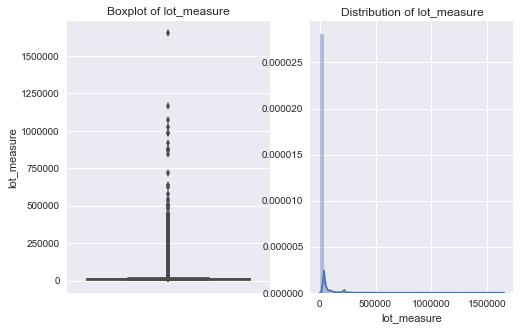

In [235]:
attributeAnalysis (dataSet.lot_measure)  

<b>Findings:</b>
* The distribution is not normalized. There are 2 clusters
* Postitive skewed and long tail. 
* 2425 Outliers. We will decide on removing outliers after performinh bi-variant analysis with target column.
* No missing values.

#### 3.1.2 ceil_measure Attribute

Range : Min - 290.0  Max - 9410.0
Mean : 1788.4  
Median : 1560.0 
Standard Deviation :  828.1 
1st Quartile (25%) : 1190.0
2nd Quartile (50%) : 1560.0
3st Quartile (75%) : 2210.0
IQR : 1020.0 
Count of Ouliers  :  611
Skewness : 1.45
Count of missing values : 0
Number of Zeros : 0


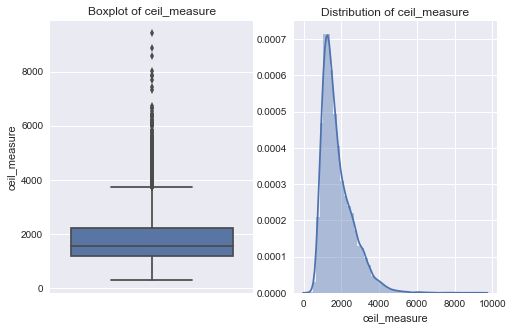

In [236]:
attributeAnalysis (dataSet.ceil_measure) 

<b>Findings:</b>
* The distribution looks normalized.
* Postitive skewed and long tail. 
* 611 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* No missing values.

#### 3.1.3 basement Attribute

Range : Min - 0.0  Max - 4820.0
Mean : 291.5  
Median : 0.0 
Standard Deviation :  442.6 
1st Quartile (25%) : 0.0
2nd Quartile (50%) : 0.0
3st Quartile (75%) : 560.0
IQR : 560.0 
Count of Ouliers  :  496
Skewness : 1.58
Count of missing values : 0
Number of Zeros : 13126


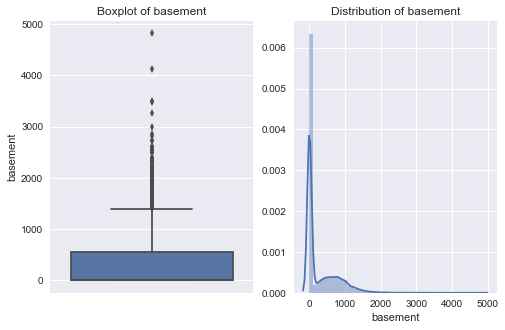

In [237]:
attributeAnalysis (dataSet.basement) 

<b>Findings:</b>
* The distribution is not normalized. It has 2 clusters
* Postitive skewed and long tail. 
* 496 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* No missing values.

#### 3.1.4 ceil Attribute

Range : Min - 1.0  Max - 3.5
Mean : 1.5  
Median : 1.5 
Standard Deviation :  0.5 
1st Quartile (25%) : 1.0
2nd Quartile (50%) : 1.5
3st Quartile (75%) : 2.0
IQR : 1.0 
Count of Ouliers  :  0
Skewness : 0.62
Count of missing values : 0
Number of Zeros : 0


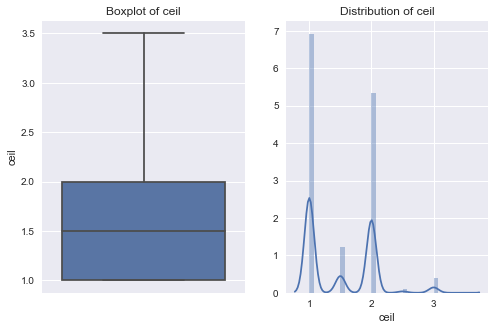

In [238]:
attributeAnalysis (dataSet.ceil)  

<b>Findings:</b>
* The distribution is not normalized. There are 4 clusters
* Postitive skewed. 
* 0 Outliers
* No missing values.

#### 3.1.5 room_bed Attribute

Range : Min - 0.0  Max - 33.0
Mean : 3.4  
Median : 3.0 
Standard Deviation :  0.9 
1st Quartile (25%) : 3.0
2nd Quartile (50%) : 3.0
3st Quartile (75%) : 4.0
IQR : 1.0 
Count of Ouliers  :  546
Skewness : 1.97
Count of missing values : 0
Number of Zeros : 13


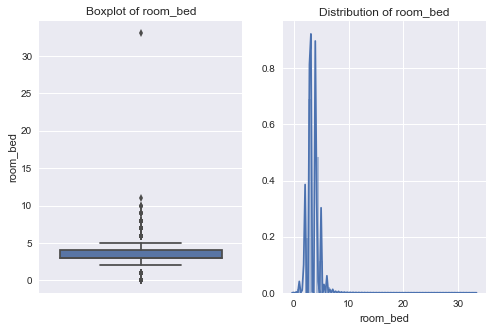

In [239]:
attributeAnalysis (dataSet.room_bed)  

<b>Findings:</b>
* The distribution is not normalized. It has lot of clusters
* Postitive skewed and long tail. 
* 546 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* There are 13 records with 0 bed rooms, it can be a valid case. 

#### 3.1.6 room_bath Attribute

Range : Min - 0.0  Max - 8.0
Mean : 2.1  
Median : 2.2 
Standard Deviation :  0.8 
1st Quartile (25%) : 1.8
2nd Quartile (50%) : 2.2
3st Quartile (75%) : 2.5
IQR : 0.8 
Count of Ouliers  :  571
Skewness : 0.51
Count of missing values : 0
Number of Zeros : 10


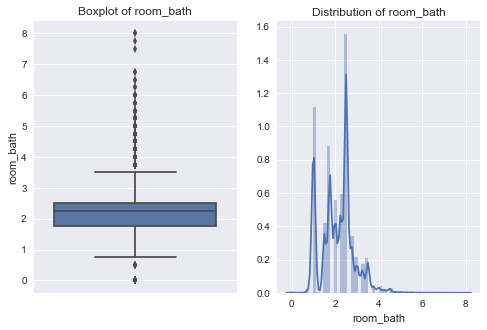

In [240]:
attributeAnalysis (dataSet.room_bath)  

<b>Findings:</b>
* The distribution is not normalized. There are lot of clusters
* Postitive skewed. 
* 571 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* There are 10 records with 0 bath rooms, it can be a valid case. 

#### 3.1.7 age_sold Attribute

Range : Min - -1.0  Max - 115.0
Mean : 43.3  
Median : 40.0 
Standard Deviation :  29.4 
1st Quartile (25%) : 18.0
2nd Quartile (50%) : 40.0
3st Quartile (75%) : 63.0
IQR : 45.0 
Count of Ouliers  :  0
Skewness : 0.47
Count of missing values : 0
Number of Zeros : 430


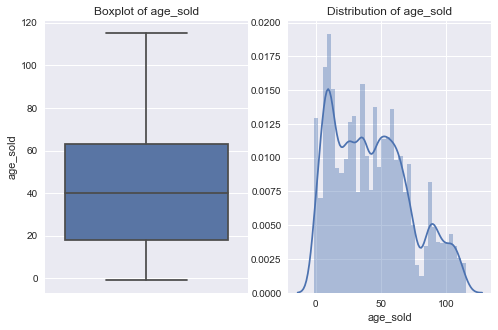

In [241]:
attributeAnalysis (dataSet.age_sold)  

<b>Findings:</b>
* The distribution is not normalized. There are lot of clusters
* Postitive skewed. 
* No outliers
* No missing values. There 430 records with 0 age, it means the house was sold on same year it was built.

#### 3.1.8 Price Attribute

Range : Min - 75000.0  Max - 7700000.0
Mean : 540182.2  
Median : 450000.0 
Standard Deviation :  367362.2 
1st Quartile (25%) : 321950.0
2nd Quartile (50%) : 450000.0
3st Quartile (75%) : 645000.0
IQR : 323050.0 
Count of Ouliers  :  1159
Skewness : 4.02
Count of missing values : 0
Number of Zeros : 0


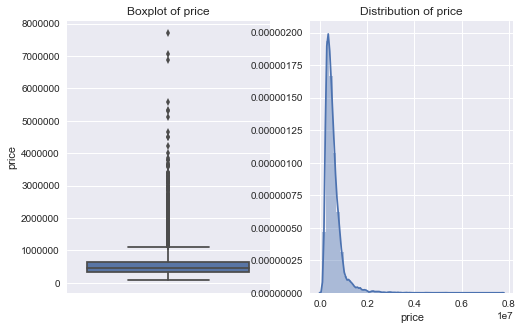

In [242]:
attributeAnalysis (dataSet.price)  

<b>Findings:</b>
* The distribution is kind of normalized
* Postitive skewed with long tail.
* There are 1159 outliers.
* No missing values. 

### 3.3 Univarient Analysis of Categorical Attributes

In [243]:
def displayCountPer(col):
    c = col.value_counts()
    p = col.value_counts(normalize=True)
    return pd.DataFrame(pd.concat([c,round(p*100,2)], axis=1, keys=['counts', '%']))

#### 3.3.1. coast Attribute

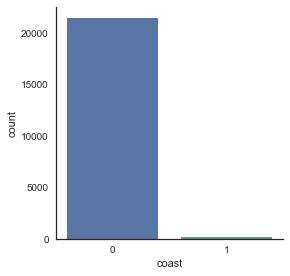

In [244]:
with sn.axes_style('white'):
    g = sn.factorplot("coast", data=dataSet, aspect=1, kind="count")
    g.set_xticklabels(step=1)

In [245]:
displayCountPer(dataSet.coast)

counts      %
0   21450  99.25
1     163   0.75

<b>Findings:</b>
* Houses without waterfront view is Maximum.
* 99% of houses are without waterfront view

#### 3.3.2. condition Attribute

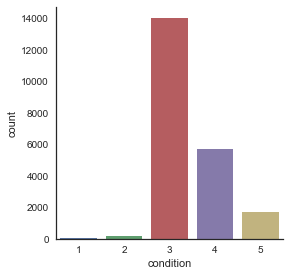

In [246]:
with sn.axes_style('white'):
    g = sn.factorplot("condition", data=dataSet, aspect=1,
                       kind="count")
    g.set_xticklabels(step=1)

In [247]:
displayCountPer(dataSet.condition)

counts      %
3   14031  64.92
4    5679  26.28
5    1701   7.87
2     172   0.80
1      30   0.14

<b>Findings:</b>
* Houses with 3 & 4 grade condition is Maximum.
* 90% of houses fall under 3 & 4 condition grade

#### 3.3.3. quality Attribute

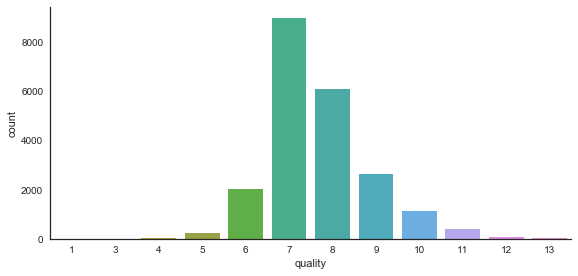

In [248]:
with sn.axes_style('white'):
    g = sn.factorplot("quality", data=dataSet, aspect=2,kind="count")
    g.set_xticklabels(step=1)

In [249]:
displayCountPer(dataSet.quality)

counts      %
7     8981  41.55
8     6068  28.08
9     2615  12.10
6     2038   9.43
10    1134   5.25
11     399   1.85
5      242   1.12
12      90   0.42
4       29   0.13
13      13   0.06
3        3   0.01
1        1   0.00

<b>Findings:</b>
* Houses with 7 & 8 grade quality is Maximum.
* 70% of houses fall under 7 & 8 grade quality

#### 3.3.4. yr_built Attribute

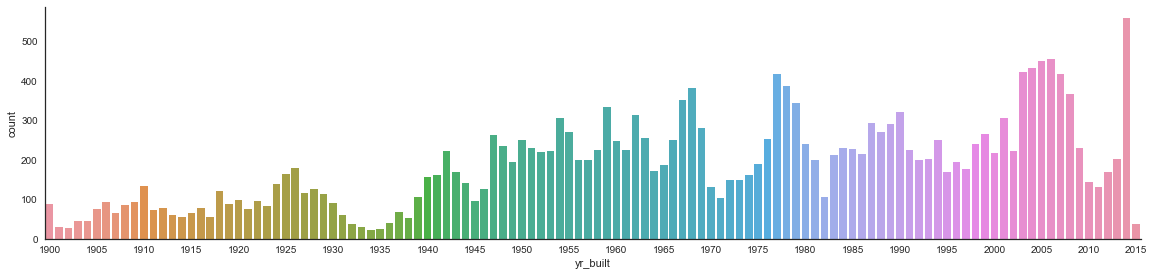

In [250]:
with sn.axes_style('white'):
    g = sn.factorplot("yr_built", data=dataSet, aspect=4,kind="count")
    g.set_xticklabels(step=5)

<b>Findings:</b>
* Houses construction has started increasing afer 1940

#### 3.3.5. zipcode Attribute

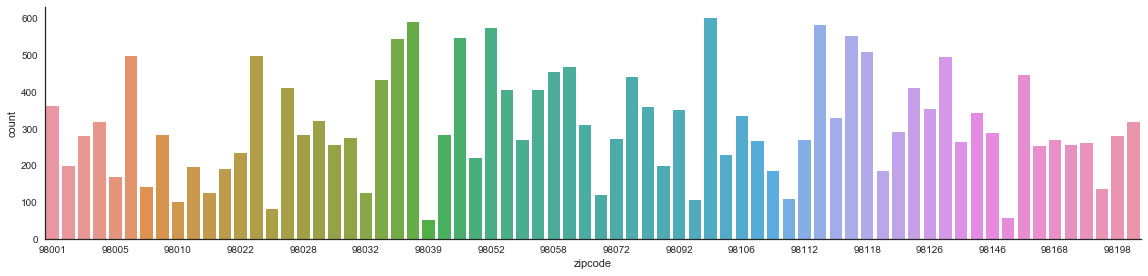

In [251]:
with sn.axes_style('white'):
    g = sn.factorplot("zipcode", data=dataSet, aspect=4,kind="count")
    g.set_xticklabels(step=4)

<b>Findings:</b>
* Houses are distributed across zipcodes. There is no specific pattern

#### 3.3.6. furnished Attribute

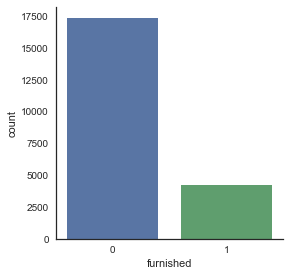

In [252]:
with sn.axes_style('white'):
    g = sn.factorplot("furnished", data=dataSet, aspect=1, kind="count")
    g.set_xticklabels(step=1)

In [253]:
displayCountPer(dataSet.furnished)

counts      %
0   17362  80.33
1    4251  19.67

<b>Findings:</b>
* 80% houses are not furnished

#### 3.3.7. yr_sold Attribute

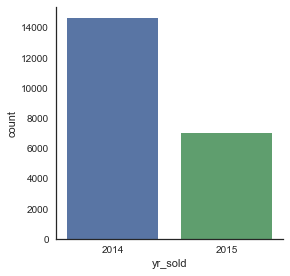

In [254]:
with sn.axes_style('white'):
    g = sn.factorplot("yr_sold", data=dataSet, aspect=1, kind="count")
    g.set_xticklabels(step=1)

In [255]:
displayCountPer(dataSet.yr_sold)

counts     %
2014   14633  67.7
2015    6980  32.3

<b>Findings:</b>
* 68% houses are sold in 2014 and rest in 2015

### 3.4 Multivarient Analysis

### 3.4.1 Relationship between Independent Attributes

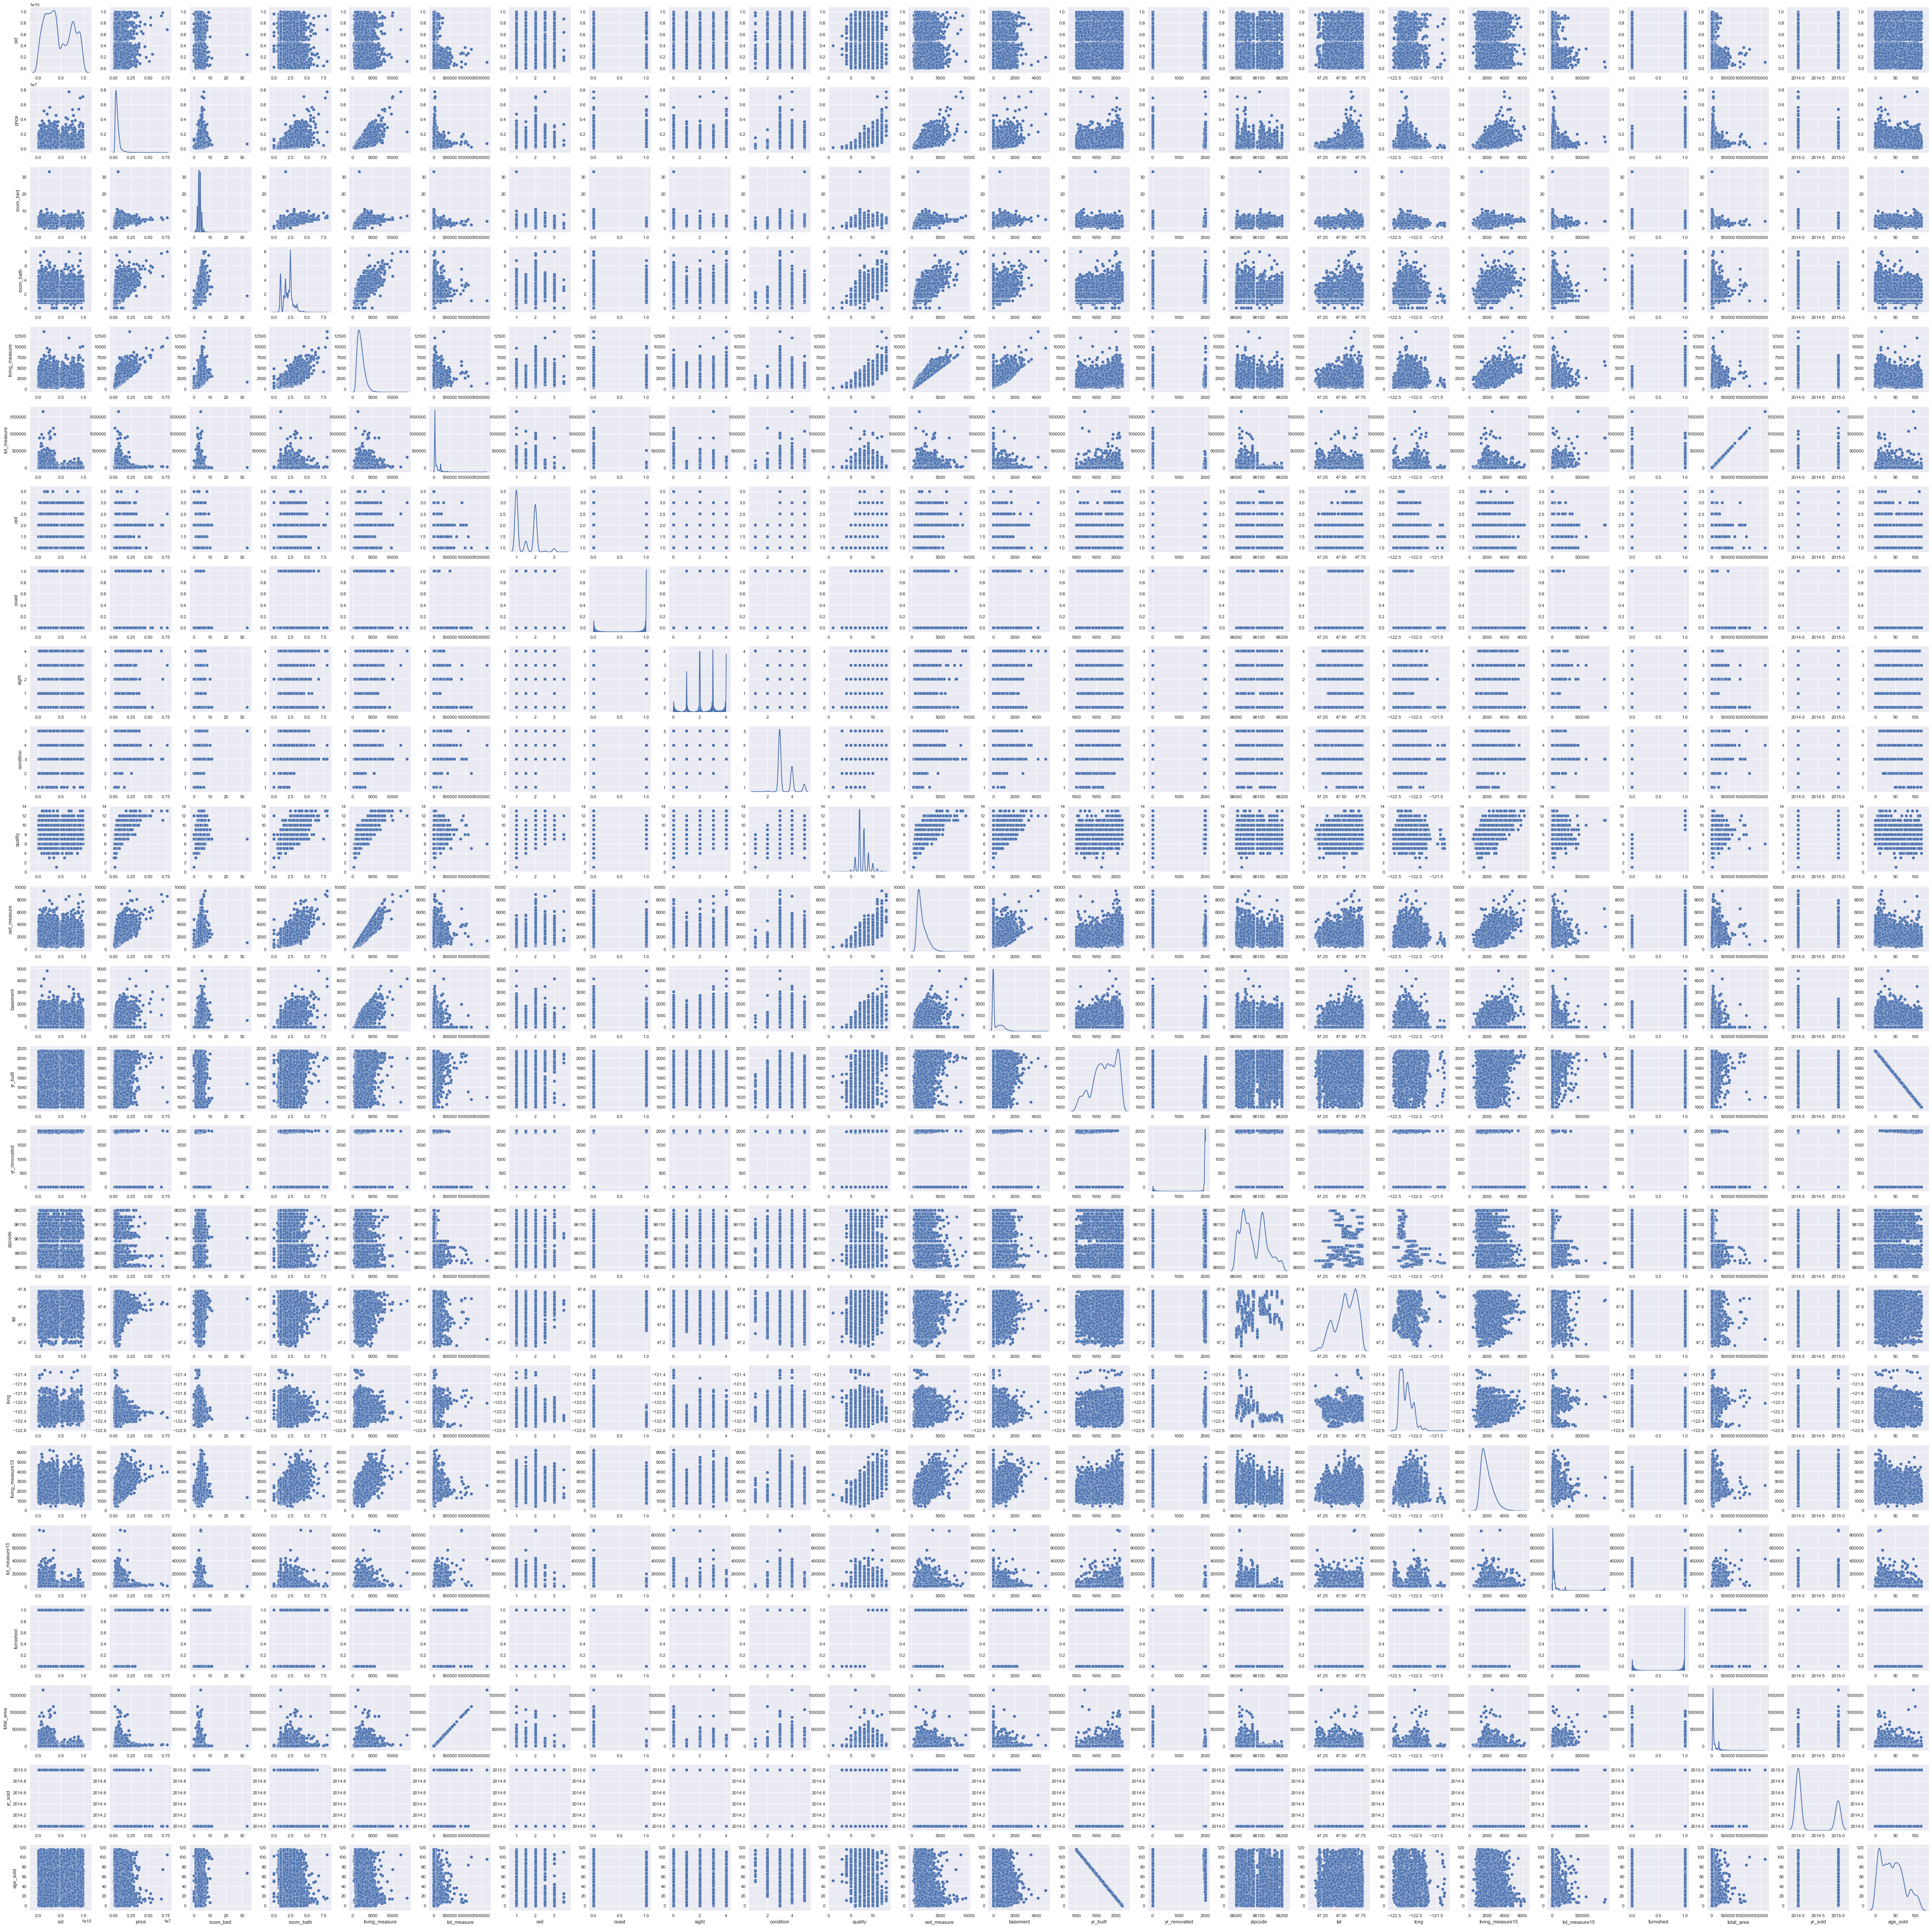

In [256]:
#Check the pairplot for relationship bewteen features.
sn.pairplot(dataSet,diag_kind='kde')

#### Findings of Diagonal Charts

* The findings independent attributes is covered in univarient analysis.

#### Findings on Relationship between Independent Attributes

* <b>room_bed</b>: It has positive linear relationship with room_bath and ceil_measure. Rest there is no relationship, scatter plot is like cloud. 
* <b>room_bath</b>: It has positive linear relationship with room_bed and ceil_measure. Rest there is no relationship, scatter plot is like cloud. 
* <b>lot_measure</b>: It does not seam to have relationship other attributes, scatter plot is like cloud. 
* <b>ceil</b>:It has positive linear relationship with room_bath and ceil_measure. Rest there is no relationship.
* <b>coast</b>:It has no relationship with other attributes
* <b>condition</b>:It has slight positive linear relationship with age sold.
* <b>Quality</b>:It has  positive linear relationship with ceil, room_bath,ceil_measure,furnished and year_built.
* <b>ceil_measure</b>:It has  positive linear relationship with ceil, room_bed,room_bath,quality,furnished and year_built.
* <b>basement</b>:It has no relationship with other attributes
* <b>yr_built</b>:It has  positive linear relationship with room_bath, ceil,quality,ceil_measure,long  and furnished.
* <b>yr_renovated</b>:It has no relationship with other attributes
* <b>zipcode</b>:It has  positive linear relationship with yr_sold.It has negative linear relationship with long
* <b>lat</b>:It has no relationship with other attributes
* <b>long</b>:It has  positive linear relationship with lot_measure, ceil_measure,  and yr_built. It has negative linear relationship with age_sold
* <b>furnished</b>:It has  positive linear relationship with room_bath, quality, ceil, ceil_measure & yr_built.
* <b>yr_sold</b>:It has no relationship with other attributes
* <b>age_sold</b>:It has negative linear relationship with room_bath,ceil,ceil_measure,quality,yr_bulit, long, furnished attributes.
* <b>renovation</b>: It has no relationship with other attributes.




### 3.4.2 Find correlation between continous variables

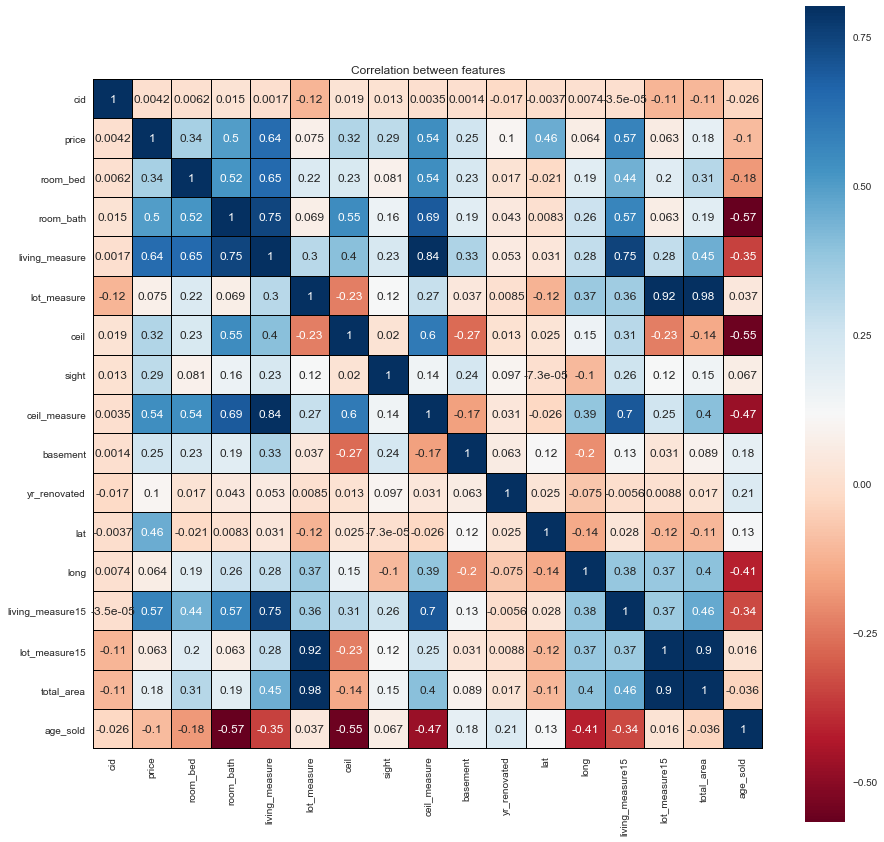

In [257]:

corMax=dataSet.corr(method='spearman')
plt.figure(figsize=(15, 15))
sn.heatmap(corMax, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="RdBu",linecolor="black")
plt.title('Correlation between features');

<b>Findings:</b>
* The correlationship between attributes is shown in a heat map. It also conveys the same message as in pairplot

#### Check the spread of houses using Lattitude and Longitude

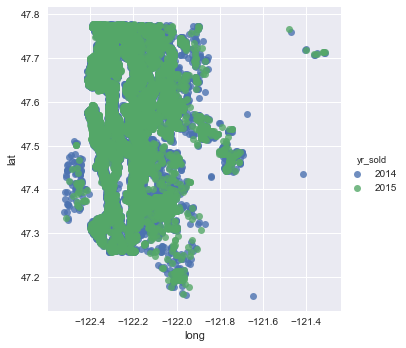

In [258]:
sn.lmplot(y='lat',x='long', data=dataSet, hue='yr_sold', fit_reg=False)

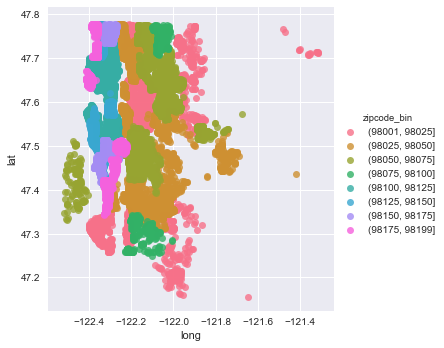

In [259]:
dataSet['zipcode_bin'] = pd.cut(dataSet.zipcode, bins=[98001, 98025, 98050,98075, 98100,98125, 98150, 98175, 98199])
sn.lmplot(y='lat',x='long', data=dataSet, hue='zipcode_bin', fit_reg=False)

<b>Findings:</b>
* From the above plot we can see that the houses are colocated in particular city.

### 3.4.3 Independent Numeric Attributes Relationship with Target Attribute (Price)

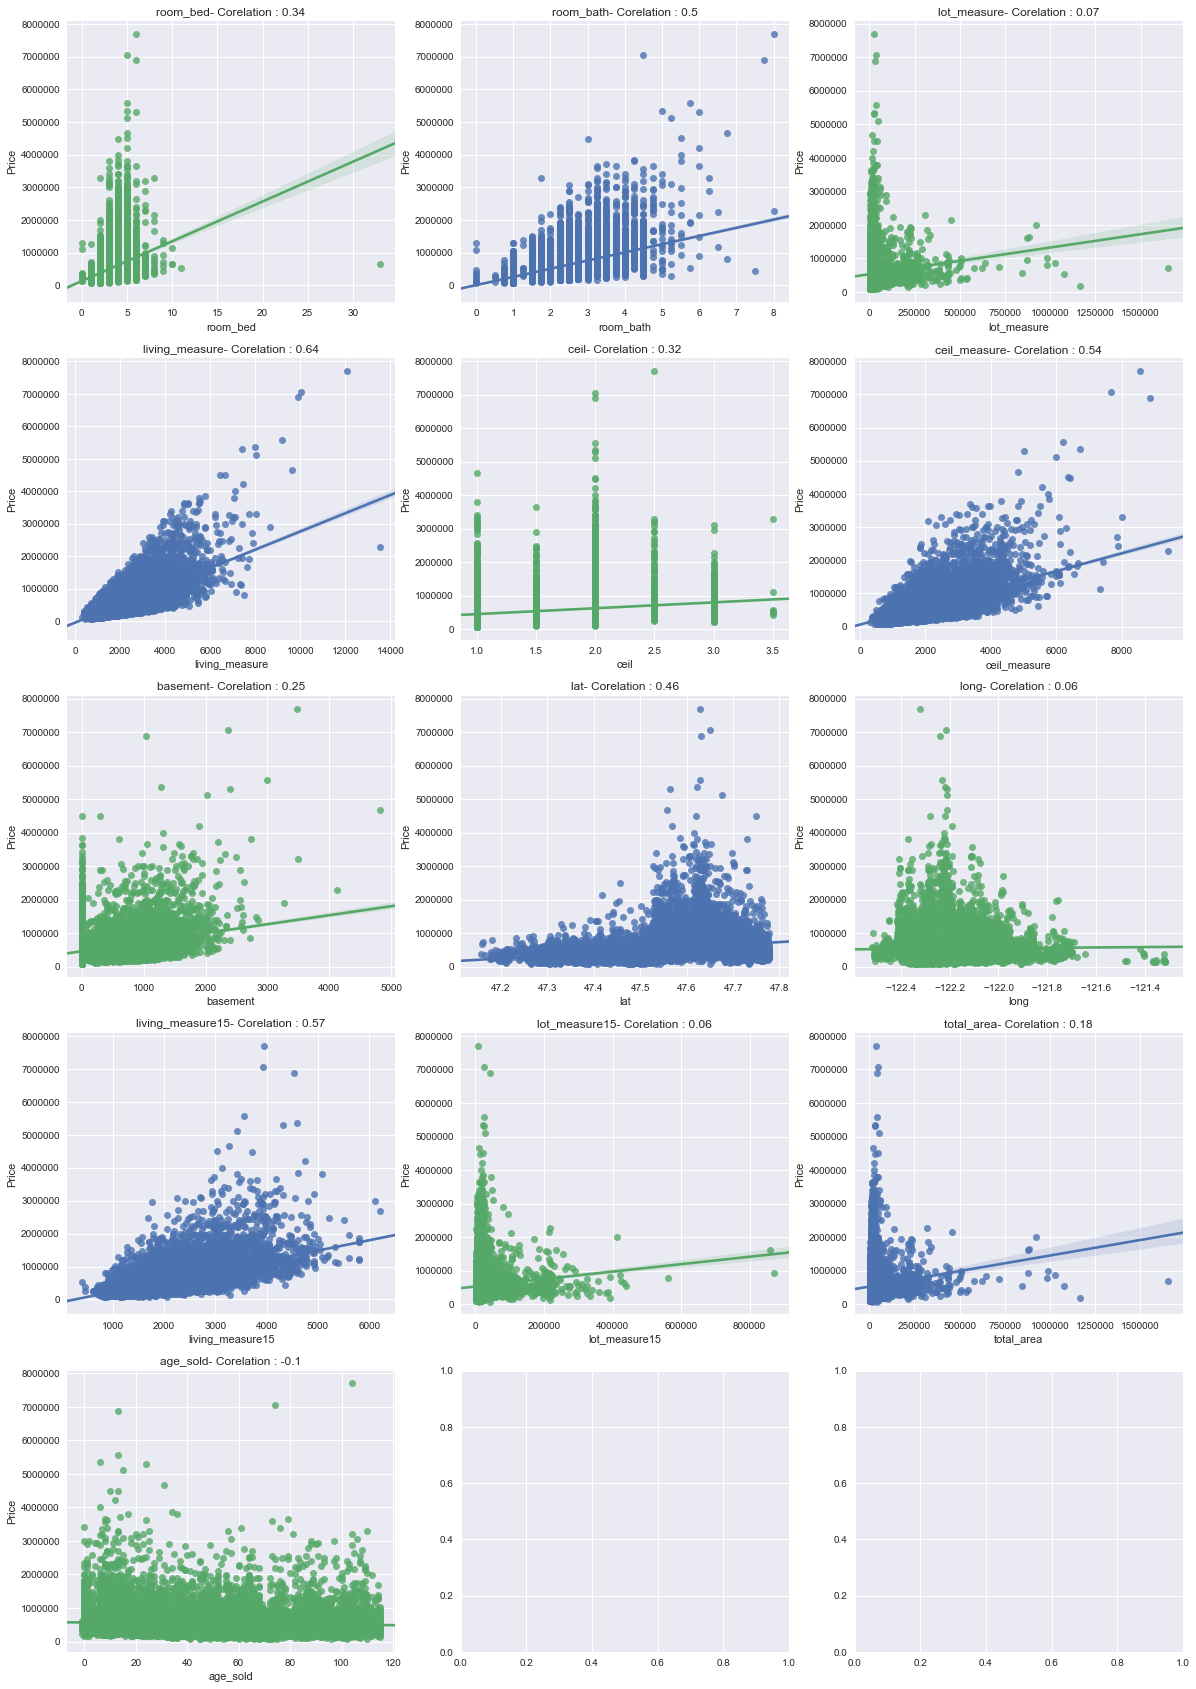

In [260]:
def getSpearmanr(indep, target):
    return indep.name + "- Corelation : " + str(round(spearmanr(indep, target)[0],2))

def plotIndividualChartsWithTarget():

    fig, axes =plt.subplots(5,3,figsize=(20,30))
    loc1 = axes[0,0]
    sn.regplot(x=dataSet.room_bed, y=dataSet.price, color="g", ax=loc1)
    loc1.set_ylabel('Price')
    loc1.set_title(getSpearmanr(dataSet.room_bed, dataSet.price))
    
    loc2 = axes[0,1]
    sn.regplot(x=dataSet.room_bath, y=dataSet.price, color="b", ax=loc2)
    loc2.set_ylabel('Price')
    loc2.set_title(getSpearmanr(dataSet.room_bath, dataSet.price))
    
    loc3 = axes[0,2]
    sn.regplot(x=dataSet.lot_measure, y=dataSet.price, color="g", ax=loc3)
    loc3.set_ylabel('Price')
    loc3.set_title(getSpearmanr(dataSet.lot_measure, dataSet.price))
    
    loc4 = axes[1,0]
    sn.regplot(x=dataSet.living_measure, y=dataSet.price, color="b", ax=loc4)
    loc4.set_ylabel('Price')
    loc4.set_title(getSpearmanr(dataSet.living_measure, dataSet.price))
    
    loc5 = axes[1,1]
    sn.regplot(x=dataSet.ceil, y=dataSet.price, color="g", ax=loc5)
    loc5.set_ylabel('Price')
    loc5.set_title(getSpearmanr(dataSet.ceil, dataSet.price))
    
    loc6 = axes[1,2]
    sn.regplot(x=dataSet.ceil_measure, y=dataSet.price, color="b", ax=loc6)
    loc6.set_ylabel('Price')
    loc6.set_title(getSpearmanr(dataSet.ceil_measure, dataSet.price))
    
    loc7 = axes[2,0]
    sn.regplot(x=dataSet.basement, y=dataSet.price, color="g", ax=loc7)
    loc7.set_ylabel('Price')
    loc7.set_title(getSpearmanr(dataSet.basement, dataSet.price))
    
    loc8 = axes[2,1]
    sn.regplot(x=dataSet.lat, y=dataSet.price, color="b", ax=loc8)
    loc8.set_ylabel('Price')
    loc8.set_title(getSpearmanr(dataSet.lat, dataSet.price))
    
    loc9 = axes[2,2]
    sn.regplot(x=dataSet.long, y=dataSet.price, color="g", ax=loc9)
    loc9.set_ylabel('Price')
    loc9.set_title(getSpearmanr(dataSet.long, dataSet.price))
    
    loc10 = axes[3,0]
    sn.regplot(x=dataSet.living_measure15, y=dataSet.price, color="b", ax=loc10)
    loc10.set_ylabel('Price')
    loc10.set_title(getSpearmanr(dataSet.living_measure15, dataSet.price))
    
    loc11 = axes[3,1]
    sn.regplot(x=dataSet.lot_measure15, y=dataSet.price, color="g", ax=loc11)
    loc11.set_ylabel('Price')
    loc11.set_title(getSpearmanr(dataSet.lot_measure15, dataSet.price))
    
    loc12 = axes[3,2]
    sn.regplot(x=dataSet.total_area, y=dataSet.price, color="b", ax=loc12)
    loc12.set_ylabel('Price')
    loc12.set_title(getSpearmanr(dataSet.total_area, dataSet.price))
    
    loc13 = axes[4,0]
    sn.regplot(x=dataSet.age_sold, y=dataSet.price, color="g", ax=loc13)
    loc13.set_ylabel('Price')
    loc13.set_title(getSpearmanr(dataSet.age_sold, dataSet.price))
    
plotIndividualChartsWithTarget()   

#### Findings:

<b>1. room_bed:</b>
* It has +ve linear relationship with price at .34 correlation
* Houses with 4,5,6 Bed rooms are priced higher.

<b>2. room_bath:</b>
* It has +ve linear relationship with price at .5 correlation
* As the bath rooms increases the price of the house too increases.

<b>3. lot_measure:</b>
* Surprisingly lot does not have a + ve linesr relationship with price.

<b>4. Living_measure:</b>
* It has +ve linear relationship with price at .64 correlation
* As the area increases the price of the house too increases, which is an expected behaviour.

<b>5. ceil:</b>
* It has +ve linear relationship with price at .32 correlation
* It is noticed that, Houses with 2 ceils are priced higher.

<b>6. ceil_measure:</b>
* It has +ve linear relationship with price at .64 correlation
* As the ceil area increases the price of the house too increases, which is an expected behaviour.

<b>7. Basement:</b>
* It has +ve linear relationship with price at .25 correlation
* As the basement area increases the price of the house too increases, which is an expected behaviour.

<b>7. Lat:</b>
* It has +ve linear relationship with price at .46 correlation
* There is not much change in latitude values. That means the houses are more or less in near by area. 

<b>8. Long:</b>
* There is no coorelation with price. The corelation value is -0.06.

<b>9. Living_measure15:</b>
* It has +ve linear relationship with price at .57 correlation
* The living measure is a measurement taken in year 2015.

<b>10. Lot_measure15:</b>
* Surprisingly lot does not have a + ve linear relationship with price.

<b>11. Total_area:</b>
* It is a total of Living Measure + Lot Measure, so it also does not show any relationship with price.

<b>12. Age_sold:</b>
* There is no coorelation with price. The corelation value is -0.01.

### 3.4.4 Independent Categorical Attributes Relationship with Target Attribute (Price)

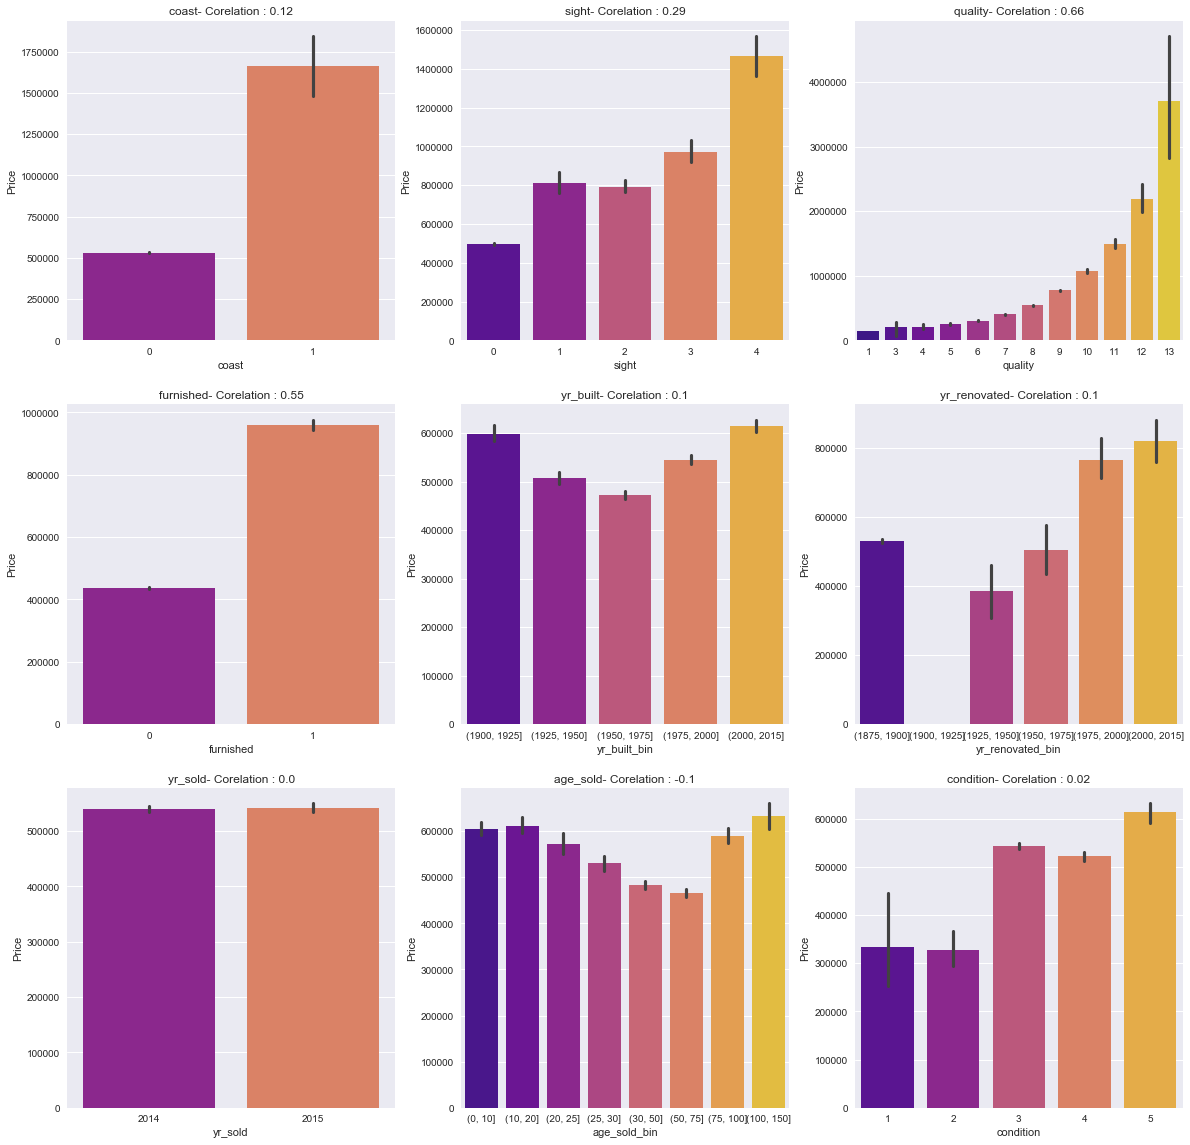

In [261]:
def plotCategoricalChartsWithTarget():
    fig, axes =plt.subplots(3,3,figsize=(20,20))
    loc1 = axes[0,0]
    sn.barplot(x =dataSet.coast, y =dataSet.price, estimator = np.mean, palette ='plasma', ax=loc1)
    loc1.set_ylabel('Price')
    loc1.set_title(getSpearmanr(dataSet.coast, dataSet.price))
    
    loc2 = axes[0,1]
    sn.barplot(x =dataSet.sight, y =dataSet.price, estimator = np.mean, palette ='plasma', ax=loc2)
    loc2.set_ylabel('Price')
    loc2.set_title(getSpearmanr(dataSet.sight, dataSet.price))
    
    loc3 = axes[0,2]
    sn.barplot(x =dataSet.quality, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc3)
    loc3.set_ylabel('Price')
    loc3.set_title(getSpearmanr(dataSet.quality, dataSet.price))
    
    loc4 = axes[1,0]
    sn.barplot(x =dataSet.furnished, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc4)
    loc4.set_ylabel('Price')
    loc4.set_title(getSpearmanr(dataSet.furnished, dataSet.price))
    
    
    loc5 = axes[1,1]
    dataSet['yr_built_bin'] = pd.cut(dataSet.yr_built, bins=[1900,1925,1950,1975,2000,2015])
    sn.barplot(x =dataSet.yr_built_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc5)
    loc5.set_ylabel('Price')
    loc5.set_title(getSpearmanr(dataSet.yr_built, dataSet.price))
    
    loc6 = axes[1,2]
    #Set wherever renovated year is zero as 1890. It just a year for binning purpose.
    dataSet.loc[dataSet.yr_renovated == 0, "yr_renovated"]=1890
    dataSet['yr_renovated_bin'] = pd.cut(dataSet.yr_renovated, bins=[1875,1900,1925,1950,1975,2000,2015])
    sn.barplot(x =dataSet.yr_renovated_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc6)
    loc6.set_ylabel('Price')
    loc6.set_title(getSpearmanr(dataSet.yr_renovated, dataSet.price))
    
    loc7 = axes[2,0] 
    sn.barplot(x =dataSet.yr_sold, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc7)
    loc7.set_ylabel('Price')
    loc7.set_title(getSpearmanr(dataSet.yr_sold, dataSet.price))
    
    loc8 = axes[2,1] 
    dataSet['age_sold_bin'] = pd.cut(dataSet.age_sold, bins=[0,10,20,25,30,50, 75, 100, 150])
    sn.barplot(x =dataSet.age_sold_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc8)
    loc8.set_ylabel('Price')
    loc8.set_title(getSpearmanr(dataSet.age_sold, dataSet.price))
    
    
    loc9 = axes[2,2] 
    sn.barplot(x =dataSet.condition, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc9)
    loc9.set_ylabel('Price')
    loc9.set_title(getSpearmanr(dataSet.condition, dataSet.price))
    
plotCategoricalChartsWithTarget()   

Text(0.5,1,'zipcode- Corelation : -0.01')

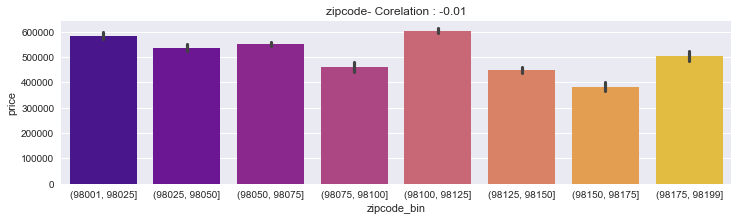

In [262]:
#dataSet['zipcode_bin'] = pd.cut(dataSet.zipcode, bins=[98001, 98025, 98050,98075, 98100,98125, 98150, 98175, 98199])
plt.figure(figsize=(12,3))
sn.barplot(x =dataSet.zipcode_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma')
plt.title(getSpearmanr(dataSet.zipcode, dataSet.price))

#### Findings

<b>1. Coast:</b>
* The water front side has higher avg price compared to non water from houses.

<b>2. sight:</b>
* The houses where there is max visits has higher avg price.
* It means as the customer visits increases house demand also increases hence price too.

<b>3. quality:</b>
* The houses with highest quality grade has higher avg price.

<b>4. furnished:</b>
* The furnished houses has higher avg price.

<b>5. yr_built:</b>
* The houses built in 1900-1925 and 2000-2015 has high avg price.
* That means antique and new house get better price.

<b>6. yr_renovated:</b>
* The bar with 1875-1900 reprsents houses not renovated.
* The more recent a house is renovated to selling time, the better price it gets.

<b>7. yr_sold:</b>
* All houses were sold in 2014 and 2015.
* there is no major difference in average price.

<b>8. age_sold:</b>
* The finding is same as yr_built.
* Houses which are 0-10 years old get good price and at the same time houses which are 75+ years are getting better price.

<b>9. condition:</b>
* The finding is same as quality.
* The houses with highest condition grade has higher avg price.

<b>10. zipcode:</b>
* Houses under zipcode 98100-98125 has higher avg price.

## 4. Data Clean up and Fixes

* Handle outliers
* Fix incorrect or typo data
* Based on the EDA, shortlist the attributes.

### 4.1 Fix data issues in columns

In [263]:
# In one of the record there is 33 bed rooms which might be a typo. Replace it will 3.
dataSet.loc[dataSet.room_bed == 33, 'room_bed'] = 3

# There 12 records for which year built is 2015 and year sold is 2014. We will fix by replacing year built as 2014
dataSet.loc[dataSet.age_sold == -1, 'yr_built'] = 2014
dataSet.loc[dataSet.age_sold == -1, 'age_sold'] = 0

### 4.2. Handle Outliers post comparision with target attribute

* The outliers identified during univariant analysis will be fixed after analysing its impact to target attribute

In [264]:
def displayCorrvalues(dataSet, cleanedDataset, colName):
    results = pd.DataFrame()
    
    corrWithOutlier = spearmanr(dataSet[colName], dataSet.price)[0]
    corrOutlierRemoved = spearmanr(cleanedDataset[colName], cleanedDataset.price)[0]
    
    results = results.append({'Attribute': colName, \
                        'Corr With Outliers': corrWithOutlier, \
                        'Corr Without Outliers': corrOutlierRemoved},ignore_index=True)
    results = results[['Attribute', 'Corr With Outliers', 'Corr Without Outliers']]
    
    return results

#Function to replace outliers lying outside IQR range with median value.
def getDataSetwithoutOutlier (dataSet, cleanedDataset, colName):
    col = dataSet[colName]
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    
    #print ("max_value {}".format(max_value))
    
    #print ("min_value {}".format(min_value))
    #print ("Mean of dataSet {} {}".format(dataSet[colName].name,dataSet[colName].mean()))
    #print("Count of Outliers in dataSet {}".format(len(findOutliers(dataSet[colName]))))
    cleanedDataset.loc[(cleanedDataset[colName] < min_value) | (cleanedDataset[colName] > max_value), colName] = \
    cleanedDataset[colName].median()
    
    return cleanedDataset


In [265]:
def checkOutlierComparedWithTarget (dataSet, colName):
    fig, (ax1, ax2) =plt.subplots(1,2, figsize=(20,5))
    sn.regplot(x=dataSet[colName], y=dataSet.price, color="g", ax=ax1)
    ax1.set_ylabel('Price')
    ax1.set_title("With outliers in {}".format(colName))
    cleanedDataset = dataSet.copy()
    cleanedDataset = getDataSetwithoutOutlier (dataSet, cleanedDataset, colName)
    #print("Count of Outliers in cleanedDataset {}".format(len(findOutliers(cleanedDataset[colName]))))
    #print ("Mean of cleanedDataset {}".format(cleanedDataset[colName].mean()))
    sn.regplot(x=cleanedDataset[colName], y=cleanedDataset.price, color="r", ax=ax2)
    ax2.set_ylabel('Price')
    ax2.set_title("Without outliers in {}".format(colName))

    return displayCorrvalues(dataSet, cleanedDataset, colName)
    

In [266]:
#Function to replace outliers lying outside IQR range with median value.
def fixOutlier (dataSet, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    dataSet.loc[(col < min_value) | (col > max_value), col.name] = col.median()

#### 4.2.1 Check and Fix Outliers for basement

Attribute  Corr With Outliers  Corr Without Outliers
0  basement            0.251706               0.186629

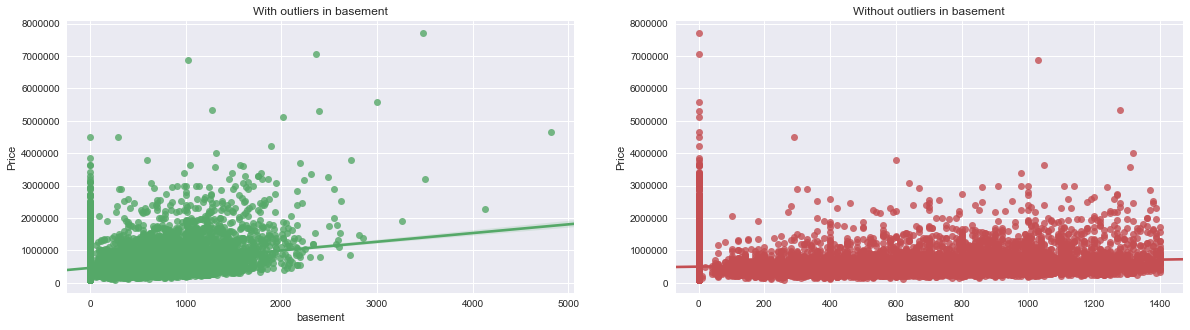

In [267]:
checkOutlierComparedWithTarget(dataSet, dataSet.basement.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [268]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.basement)

#### 4.2.2. Check and Fix Outliers for lot measure

Attribute  Corr With Outliers  Corr Without Outliers
0  lot_measure            0.074937              -0.006609

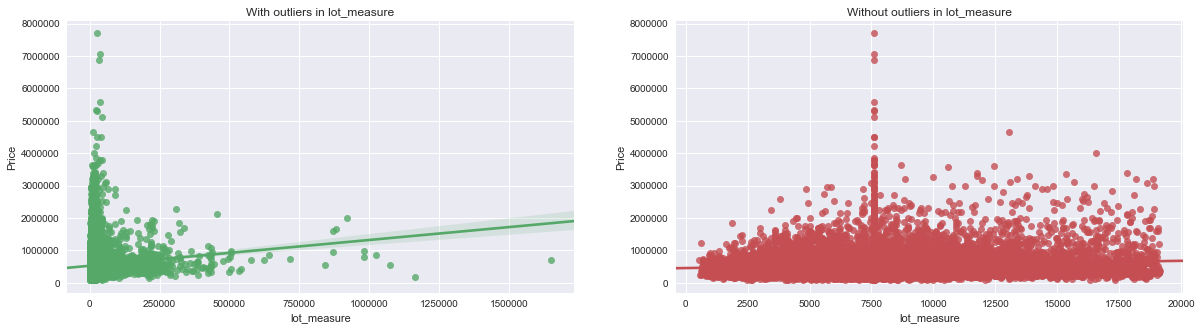

In [269]:
checkOutlierComparedWithTarget(dataSet, dataSet.lot_measure.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [270]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.lot_measure)

#### 4.2.3. Check and Fix Outliers for ceil measure

Attribute  Corr With Outliers  Corr Without Outliers
0  ceil_measure            0.541752                0.49026

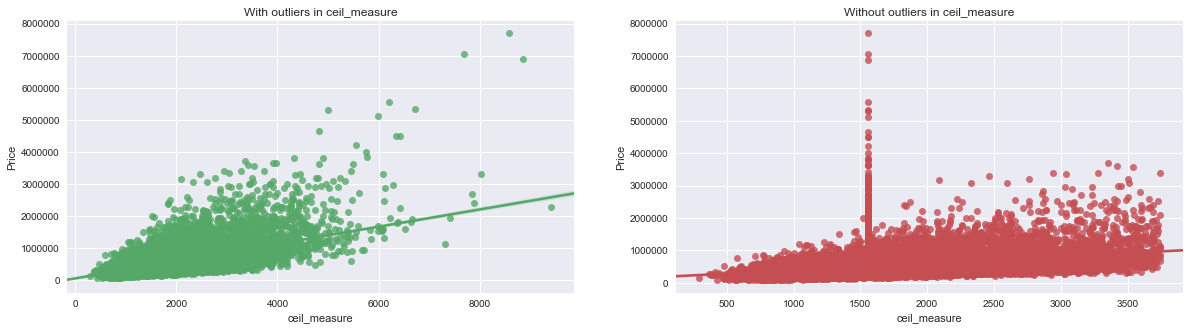

In [271]:
checkOutlierComparedWithTarget(dataSet, dataSet.ceil_measure.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [272]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.ceil_measure)

#### 4.2.4 Check and Fix Outliers for Bed Rooms

Attribute  Corr With Outliers  Corr Without Outliers
0  room_bed            0.344584               0.322888

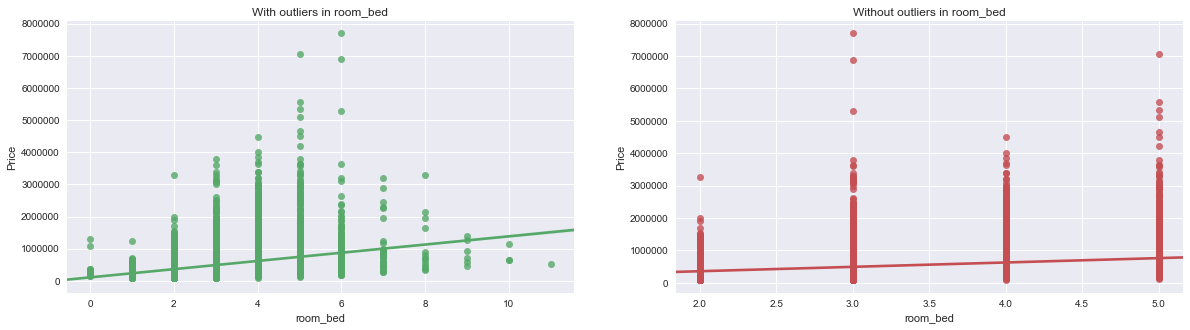

In [273]:
checkOutlierComparedWithTarget(dataSet, dataSet.room_bed.name)

<b>Findings:</b>
* There is no major corr diff with and without outliers, hence no need to fix the outliers for room_bed.

#### 4.2.5 Check and Fix Outliers for Bath Rooms

Attribute  Corr With Outliers  Corr Without Outliers
0  room_bath            0.497162                0.45665

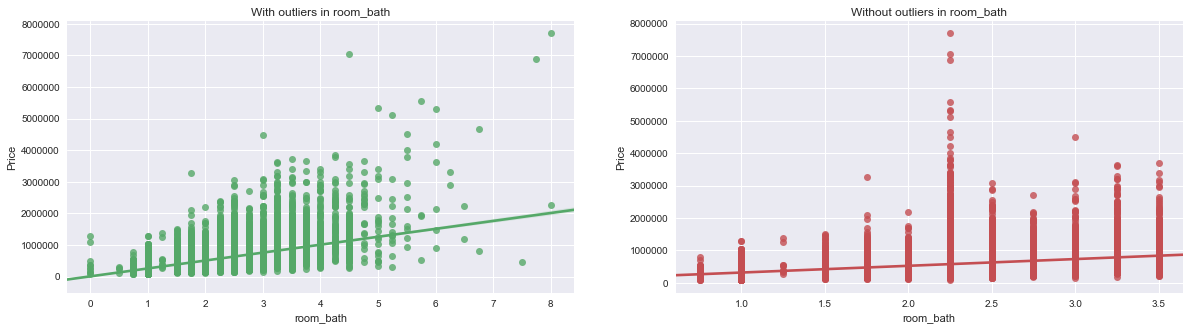

In [274]:
checkOutlierComparedWithTarget(dataSet, dataSet.room_bath.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [275]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.room_bath)

### 4.3 Refine columns required for Modeling

1. <b>cid</b> - This is just a identifier, it may not be required for modeling
2. <b>dayhours</b> - This column by itself does not have any significance. The year sold value is extracted from it.  hence it is not used for modeling
3. <b>living_measure</b> - This column is not reqiuired for modeling, explaination is given in section 2.3
4. <b>total_area</b> - This column is not reqiuired for modeling, explaination is given in section 2.3
5. <b>lot_measure15</b> - Need to analyze further
6. <b>living_measure15</b> - Need to analyze further

In [276]:
# Retain the copy of dataSet in another copy for future purpose.
dataSet_master = dataSet.copy()

In [277]:
#Analyze the lot_measure15 & living_measure15 columns whether to retain or not.
#1. Find all houses which has different lot measure and living measure value once it was remeasured in 2015
#2. From above, find the houses which were sold in 2015 and which year it was renovated
tempDF = dataSet_master.query('(living_measure + lot_measure) != (living_measure15 + lot_measure15)')
x = tempDF.groupby(['yr_sold', 'yr_renovated']).agg({'yr_renovated': 'count'}).rename(columns={'yr_renovated':'Count'}).reset_index()
x[x.yr_sold == 2015]

yr_sold  yr_renovated  Count
68     2015          1890   6565
69     2015          1945      1
70     2015          1946      1
71     2015          1950      2
72     2015          1951      1
73     2015          1956      1
74     2015          1957      1
75     2015          1960      2
76     2015          1962      1
77     2015          1963      2
78     2015          1964      2
79     2015          1965      2
80     2015          1967      1
81     2015          1968      2
82     2015          1969      1
83     2015          1970      2
84     2015          1972      2
85     2015          1973      1
86     2015          1974      1
87     2015          1975      3
88     2015          1976      1
89     2015          1977      4
90     2015          1978      2
91     2015          1979      1
92     2015          1980      2
93     2015          1982      1
94     2015          1983      4
95     2015          1984      9
96     2015          1985      2
97     2015          1986      3
98     2015          1987      4
99     2015          1988      2
100    2015          1989      8
101    2015          1990      7
102    2015          1991      5
103    2015          1992      2
104    2015          1993      5
105    2015          1994      6
106    2015          1995      7
107    2015          1996      6
108    2015          1997      4
109    2015          1998      4
110    2015          1999      4
111    2015          2000     13
112    2015          2001      4
113    2015          2002      5
114    2015          2003      9
115    2015          2004      7
116    2015          2005     11
117    2015          2006      2
118    2015          2007     15
119    2015          2008      8
120    2015          2009      7
121    2015          2010      5
122    2015          2011      2
123    2015          2012      2
124    2015          2013      7
125    2015          2014     15
126    2015          2015     10

<b>Findings:</b>

* There 21102 houses for which lot & living measurement changed in 2015 recording.
* Out of which, there are 6809 houses sold in 2015, and 6565 houses were never renovated.
* That means the change in measurement for 96% houses is not due to house renovation.
* So we could conclude that lot_measure15 & living_measure15 columns does not have any significance. Hence it will not be considered for any other analysis.

In [278]:
# Drop columns living_measure, living_measure15 ,lot_measure15, total_area,  Sight, dayhours
dataSet.drop(['cid','living_measure','living_measure15','lot_measure15','total_area', 'dayhours'], axis=1, inplace=True)

In [279]:
# Drop bin columns used for analysis
#dataSet.drop(['yr_built_bin','yr_renovated_bin','age_sold_bin','zipcode_bin'], axis=1, inplace=True)

In [280]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
lot_measure         21613 non-null float64
ceil                21613 non-null float64
coast               21613 non-null category
sight               21613 non-null int64
condition           21613 non-null category
quality             21613 non-null category
ceil_measure        21613 non-null float64
basement            21613 non-null float64
yr_built            21613 non-null category
yr_renovated        21613 non-null int64
zipcode             21613 non-null category
lat                 21613 non-null float64
long                21613 non-null float64
furnished           21613 non-null category
yr_sold             21613 non-null category
age_sold            21613 non-null int64
zipcode_bin         21251 non-null category
yr_built_bin        21526 non-nul

In [281]:
dataSet.to_csv('innercity_formatted.csv')

## 4. Model Selection (Week 3-  In Progress)

In [282]:

predictor_attributes = dataSet[['room_bed','room_bath','lot_measure','ceil','coast','sight','condition',\
                               'quality','ceil_measure','basement','yr_built','yr_renovated','zipcode','lat',\
                               'long','furnished','yr_sold','age_sold']]


# Scale the data to z-score
predictor_attributes_z = predictor_attributes.apply(zscore)


# Split X and y into training, validation and test sets. validation set will be used for Hyperparmeter finetuning.

y = dataSet['price']
X = predictor_attributes_z
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=1)

# X_train, & y_train - It will have Training data
# X_test, & y_test - It will have Test data
# X_val, & y_val - It will have Validation data

print("Training Data size : "+ str(X_train.shape))
print("Validation Data size : "+ str(X_val.shape))
print("Testing Data size : "+ str(X_test.shape))


Training Data size : (12156, 18)
Validation Data size : (4053, 18)
Testing Data size : (5404, 18)


In [283]:
# A generic function to execute model & calculate model score

#Function to execute the model with KFold Technique.
def executeModelWithKfold (model, X, y):
    
    num_folds = 10
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed)
    result = cross_val_score(model, X, y, cv=kfold)
    print('Score of model with Kfold: {:.2f}'.format(result.mean()))
    return str(round(result.mean(),2)), result

#Function RSME of predicted and target values
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def comparePredActual(y_test, y_pred):
    
    corrWithResult = str(round(pearsonr(y_pred, y_test)[0],2))
    
    sn.set(style="darkgrid", color_codes=True)
    with sn.axes_style("white"):
        sn.jointplot(x=y_test, y=y_pred, kind="reg", color="k")
        plt.show()
    print('pearsonr : {}'.format(corrWithResult))
    return corrWithResult

#Generic function to execute model and publish results
def executeModel(model, X_train, X_test, y_train, y_test, X, y, model_name, results ):
    
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    pearsoncorr = comparePredActual(y_test, y_predict)
    model_score_train = str(round(model.score(X_train, y_train),2))
    model_score_test = str(round(model.score(X_test, y_test),2))
    rmse_val = str(round(rmse(y_predict, y_test), 3))
    print('RMSE : {}'.format(rmse_val))
   
    kfold_score, tResult =   executeModelWithKfold(model, X, y)
    
    results = results.append({'Model': model_name, \
                        'Train Score': model_score_train, \
                        'Test Score': model_score_test, \
                        "Kfold Test Score": kfold_score, \
                        "pearsonr": pearsoncorr, \
                        "RMSE": rmse_val},ignore_index=True)
    results = results[['Model', 'Train Score', 'Test Score', "Kfold Test Score", 'RMSE', 'pearsonr']]
    
    return results
    
    

### 4.1 Linear Regression

Test the model with Simple Linear Regression

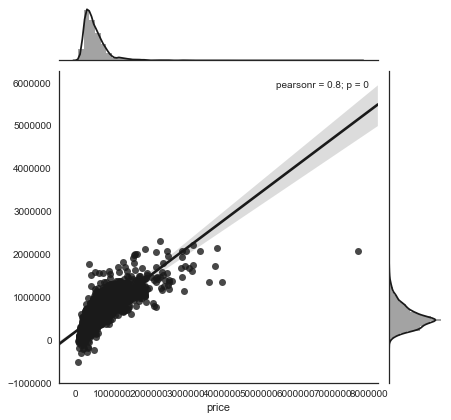

pearsonr : 0.8
RMSE : 217448.917
Score of model with Kfold: 0.63


Model Train Score Test Score Kfold Test Score        RMSE  \
0  Linear Regression        0.62       0.64             0.63  217448.917   

  pearsonr  
0      0.8

In [284]:
regression_model = LinearRegression()
# Execute the model
results = pd.DataFrame()
results = executeModel (regression_model, X_train, X_test, y_train, y_test, X, y, "Linear Regression", results)
results

<b>Findings:</b>
* <'Pending for updation>

### 4.2. Polynomial model (quadratic)

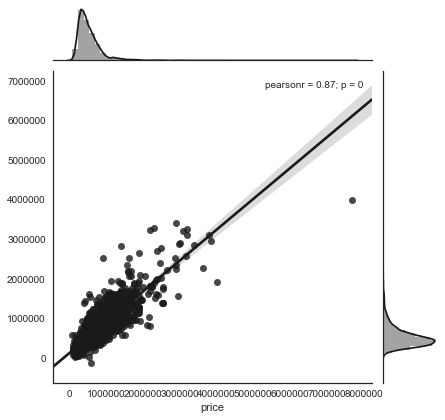

pearsonr : 0.87
RMSE : 178856.628
Score of model with Kfold: 0.63


Model Train Score Test Score Kfold Test Score        RMSE  \
0  Linear Regression        0.62       0.64             0.63  217448.917   
1   Polynomial model        0.76       0.75             0.63  178856.628   

  pearsonr  
0      0.8  
1     0.87

In [285]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly_model.fit_transform(X_train)
X_test_ = poly_model.fit_transform(X_test)

results = executeModel (regression_model, X_train_, X_test_, y_train, y_test, X, y, "Polynomial model", results)
results

<b>Findings:</b>
* <'Pending for updation>

### 4.3. Decision Tree Regressor

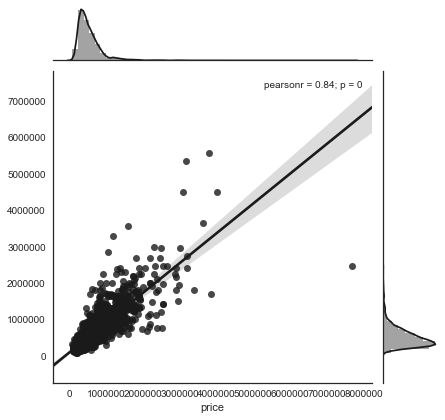

pearsonr : 0.84
RMSE : 198171.252
Score of model with Kfold: 0.64


Model Train Score Test Score Kfold Test Score  \
0        Linear Regression        0.62       0.64             0.63   
1         Polynomial model        0.76       0.75             0.63   
2  Decision Tree Regressor         1.0        0.7             0.64   

         RMSE pearsonr  
0  217448.917      0.8  
1  178856.628     0.87  
2  198171.252     0.84

In [286]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
results = executeModel (dtr_model, X_train, X_test, y_train, y_test, X, y, "Decision Tree Regressor", results)
results

<b>Findings:</b>
* <'Pending for updation>

### 4.4. Decision Tree Regressor with regularization

Let us do some reqularization to address overfitment.

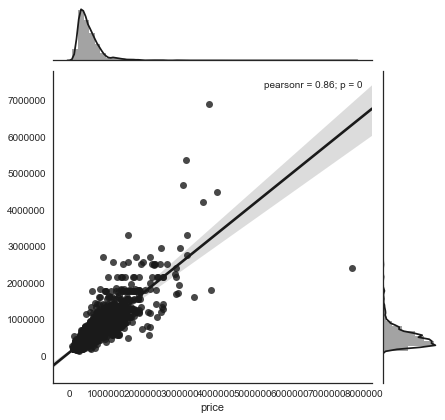

pearsonr : 0.86
RMSE : 188447.49
Score of model with Kfold: 0.71


Model Train Score Test Score  \
0                            Linear Regression        0.62       0.64   
1                             Polynomial model        0.76       0.75   
2                      Decision Tree Regressor         1.0        0.7   
3  Decision Tree Regressor with regularization        0.91       0.73   

  Kfold Test Score        RMSE pearsonr  
0             0.63  217448.917      0.8  
1             0.63  178856.628     0.87  
2             0.64  198171.252     0.84  
3             0.71   188447.49     0.86

In [287]:
dtr_model_regularization = DecisionTreeRegressor(max_depth = 10,random_state=1)

results = executeModel (dtr_model_regularization, X_train, X_test, y_train, y_test, X, y, "Decision Tree Regressor with regularization", results)
results

<b>Findings:</b>
* <'Pending for updation>

### 4.5 Find important features 

Let us explore the option of removing the insignificant features and check the performance.

Text(0,0.5,'Feature Importance Score')

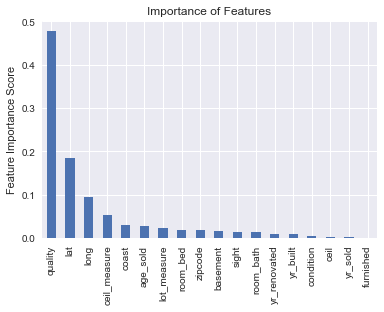

In [288]:
predictors=list(X_train)
feat_imp = pd.Series(dtr_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [289]:
predictor_attributes_reduced = dataSet[['room_bed','room_bath','lot_measure','coast','sight',\
                               'quality','ceil_measure','basement','yr_renovated','zipcode','lat',\
                               'long','age_sold']]


# Scale the data to z-score
predictor_attributes_reduced_z = predictor_attributes_reduced.apply(zscore)


# Split X and y into training, validation and test sets. validation set will be used for Hyperparmeter finetuning.

y = dataSet['price']
X = predictor_attributes_reduced_z
X_reduced_trainval, X_reduced_test, y_reduced_trainval, y_reduced_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_reduced_train, X_reduced_val, y_reduced_train, y_reduced_val = train_test_split(X_reduced_trainval, y_reduced_trainval, test_size=0.25, random_state=1)

# X_train, & y_train - It will have Training data
# X_test, & y_test - It will have Test data
# X_val, & y_val - It will have Validation data

print("Training Data size : "+ str(X_reduced_train.shape))
print("Validation Data size : "+ str(X_reduced_val.shape))
print("Testing Data size : "+ str(X_reduced_test.shape))

Training Data size : (12156, 13)
Validation Data size : (4053, 13)
Testing Data size : (5404, 13)


<b>Findings:</b>
* <'Pending for updation>

### 4.6 Decision Tree Regressor with reduced Attributes

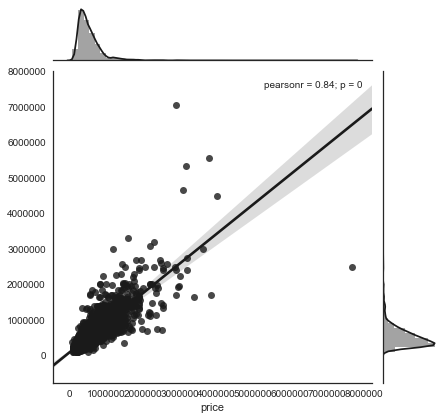

pearsonr : 0.84
RMSE : 206613.715
Score of model with Kfold: 0.67


Model Train Score Test Score  \
0                                Linear Regression        0.62       0.64   
1                                 Polynomial model        0.76       0.75   
2                          Decision Tree Regressor         1.0        0.7   
3      Decision Tree Regressor with regularization        0.91       0.73   
4  Decision Tree Regressor with reduced Attributes         1.0       0.67   

  Kfold Test Score        RMSE pearsonr  
0             0.63  217448.917      0.8  
1             0.63  178856.628     0.87  
2             0.64  198171.252     0.84  
3             0.71   188447.49     0.86  
4             0.67  206613.715     0.84

In [290]:
dtr_model_reduced = DecisionTreeRegressor()
results = executeModel (dtr_model_reduced, X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test, X, y, "Decision Tree Regressor with reduced Attributes", results)
results

<b>Findings:</b>
* <'Pending for updation>

### 4.7. Gradient Boosting Regressor with reduced Attributes

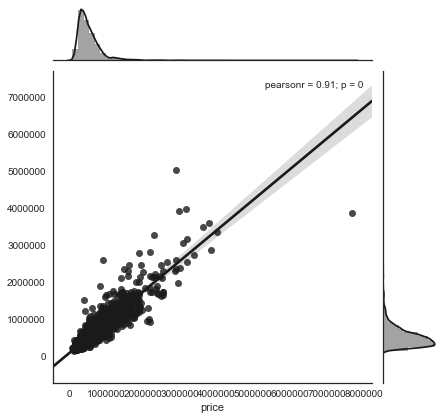

pearsonr : 0.91
RMSE : 146617.629
Score of model with Kfold: 0.83


Model Train Score Test Score  \
0                                  Linear Regression        0.62       0.64   
1                                   Polynomial model        0.76       0.75   
2                            Decision Tree Regressor         1.0        0.7   
3        Decision Tree Regressor with regularization        0.91       0.73   
4    Decision Tree Regressor with reduced Attributes         1.0       0.67   
5  Gradient Boosting Regressor with reduced Attri...        0.87       0.84   

  Kfold Test Score        RMSE pearsonr  
0             0.63  217448.917      0.8  
1             0.63  178856.628     0.87  
2             0.64  198171.252     0.84  
3             0.71   188447.49     0.86  
4             0.67  206613.715     0.84  
5             0.83  146617.629     0.91

In [291]:
GBR_model=GradientBoostingRegressor()

results = executeModel (GBR_model, X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test, X, y, "Gradient Boosting Regressor with reduced Attributes", results)
results

<b>Findings:</b>
* <'Pending for updation>

### 4.8. Ada Boost Regressor with reduced Attributes

### 4.9. Random Forest Regressor

### 4.10. XGB Regressor

### Principal Component Analysis

### Hyper Parameter Tuning

### Ensemble Techniques (Bagging, Adaboost)

### Regularization with Ridge and Lasso Regression

### Find the performance at 95% confidence interval.

### Conclusion